# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [65]:
import tensorflow as tf

## Get the dataset

In [66]:
# Import the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [67]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

## Visualize the dataset
Print some images with labels.

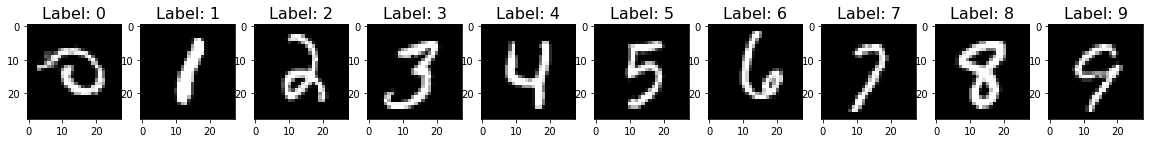

In [68]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 10, figsize=(20,20))
for i in range(0, 10):
  sample = X_train[Y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

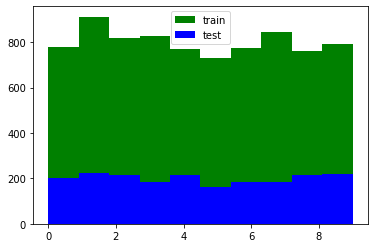

In [69]:
import numpy as np
plt.hist(Y_train,color='g',label='train')
plt.hist(Y_test,color='b',label='test')
plt.legend()
plt.show()

In [70]:
# Pre processing 
X_train = X_train / 255.0
X_test = X_test / 255.0

## Model

In [77]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(16, (4, 4), activation='relu'))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.75))
model.add(layers.Dense(10,activation='softmax'))

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 


In [78]:
# Compile the model (add optimizers and metrics)
model.learning_rate =0.015
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20,validation_split=0.4)



Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


150/150 [==============================] - 2s 7ms/step - loss: 1.4901 - accuracy: 0.4648 - val_loss: 0.3204 - val_accuracy: 0.9287
Epoch 2/20
150/150 [==============================] - 1s 6ms/step - loss: 0.5323 - accuracy: 0.8371 - val_loss: 0.1793 - val_accuracy: 0.9509
Epoch 3/20
150/150 [==============================] - 1s 5ms/step - loss: 0.3028 - accuracy: 0.9054 - val_loss: 0.1317 - val_accuracy: 0.9634
Epoch 4/20
150/150 [==============================] - 1s 5ms/step - loss: 0.2350 - accuracy: 0.9335 - val_loss: 0.1131 - val_accuracy: 0.9697
Epoch 5/20
150/150 [==============================] - 1s 6ms/step - loss: 0.1857 - accuracy: 0.9502 - val_loss: 0.1299 - val_accuracy: 0.9734
Epoch 6/20
150/150 [==============================] - 1s 6ms/step - loss: 0.1564 - accuracy: 0.9590 - val_loss: 0.1067 - val_accuracy: 0.9719
Epoch 7/20
150/150 [==============================] - 1s 5ms/step - loss: 0.1264 - accuracy: 0.9631 - val_loss: 0.0990 - val_accuracy: 0.9731
Epoch 8/20
150/15

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 - 0s - loss: 0.0666 - accuracy: 0.9840 - 295ms/epoch - 5ms/step


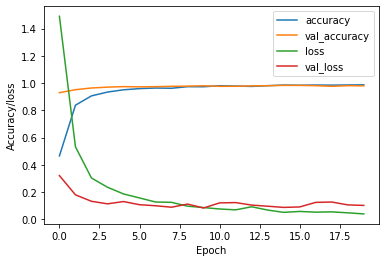

In [79]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/loss')
plt.legend()

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

## Predict some images
Print the image along with its label (true value) and predicted value.

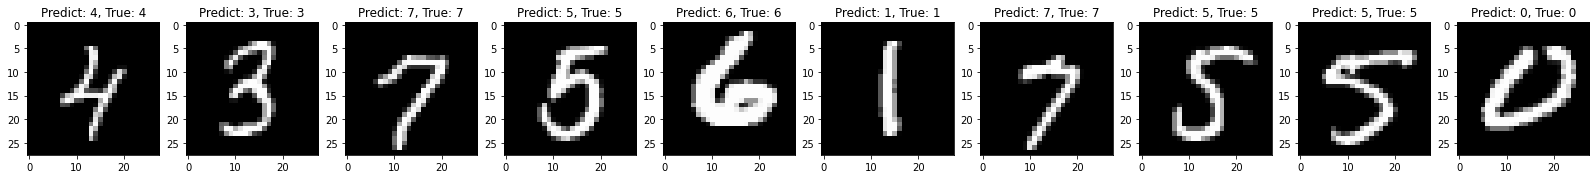

In [80]:
predictions=model.predict(X_test)
predictions=np.argmax(predictions, axis=1)
predictions
f, ax = plt.subplots(1, 10, figsize=(28,28))
for i in range(0, 10):
  ax[i].imshow(X_test[i], cmap='gray')
  ax[i].set_title("Predict: {}, True: {}".format(predictions[i], Y_test[i]), fontsize=12)